In [1]:
#importing libraries

import tensorflow as tf
import pandas as pd

2025-11-19 14:01:54.388534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

### Training and Validation Image pre-Processing

In [2]:
trainer_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)


Found 3200 files belonging to 8 classes.


I0000 00:00:1763541120.349796   34442 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2605 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)


Found 800 files belonging to 8 classes.


In [4]:
for x,y in trainer_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[187.8086   210.8086   228.8086  ]
   [186.86328  208.86328  229.86328 ]
   [185.8125   207.8125   228.8125  ]
   ...
   [137.       166.       200.      ]
   [136.       164.       201.      ]
   [134.4375   162.4375   199.4375  ]]

  [[187.38672  210.38672  228.38672 ]
   [186.6875   208.6875   229.6875  ]
   [184.9414   206.9414   227.9414  ]
   ...
   [137.       166.       200.      ]
   [136.       164.       201.      ]
   [134.4375   162.4375   199.4375  ]]

  [[187.       210.       228.      ]
   [185.6875   207.6875   228.6875  ]
   [184.625    206.625    227.625   ]
   ...
   [137.       166.       200.      ]
   [136.       164.       201.      ]
   [134.4375   162.4375   199.4375  ]]

  ...

  [[159.375    183.375    208.08594 ]
   [138.0625   163.75     191.9414  ]
   [134.22266  160.52734  193.07031 ]
   ...
   [139.       163.       187.      ]
   [139.       163.       187.      ]
   [138.4375   162.4375   186.4375  ]]

  [[159.80078  183.80078  210.4023

##  Building Model

### To avoid overshooting 
1. We can reduce the learning rate from 0.001 to 0.0001
2. It may because underfitting , so we increase the number of neurons
3. Add more convulation layer to extract more details from images, there may be possibility that model is unable to captuire the relevent feature or the model is confused due to lack of feature

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

### convolutional Layers

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/gulshan/Desktop/MyVityarthi/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
# model.add(Dropout(0.25)) #To avoid ovetfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
# model.add(Dropout(0.2)) #To avoid ovetfitting

In [16]:
#Output layer
model.add(Dense(units=8,activation='softmax'))#sofmazx to give  probability of each class in each neuron and 8 for the  number of classes

### Compiler Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        12,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [19]:
training_history = model.fit(x=trainer_set,validation_data=validation_set,epochs=10) #record training history

Epoch 1/10


2025-11-19 14:02:05.686500: I external/local_xla/xla/service/service.cc:163] XLA service 0x7df1f4003160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-19 14:02:05.686687: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-11-19 14:02:05.773078: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-19 14:02:06.745935: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-11-19 14:02:07.261334: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call

  1/100 ━━━━━━━━━━━━━━━━━━━━ 27:24 17s/step - accuracy: 0.1250 - loss: 2.2856

I0000 00:00:1763541139.586890   34526 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3676 - loss: 1.7226

2025-11-19 14:02:28.974756: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-19 14:02:29.102723: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,128,128]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$c

100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 128ms/step - accuracy: 0.5281 - loss: 1.2816 - val_accuracy: 0.7588 - val_loss: 0.6505
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.8275 - loss: 0.4607 - val_accuracy: 0.7375 - val_loss: 0.6717
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.8953 - loss: 0.3003 - val_accuracy: 0.8575 - val_loss: 0.3983
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9347 - loss: 0.1919 - val_accuracy: 0.8900 - val_loss: 0.3659
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9297 - loss: 0.2053 - val_accuracy: 0.8925 - val_loss: 0.3455
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9538 - loss: 0.1303 - val_accuracy: 0.9225 - val_loss: 0.2460
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9734 - loss: 0.0767 - val_accuracy: 0.9325 - val_loss: 0.2368
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9638 - loss: 0.1064 - val_accura

### Model Evaluation

In [20]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(trainer_set)

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9956 - loss: 0.0172


In [21]:
print(train_loss,train_acc)

0.0172466691583395 0.9956250190734863


In [22]:
#model evaluation on validition set
valid_loss,valid_acc = model.evaluate(validation_set)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9588 - loss: 0.1639


In [23]:
print(valid_loss,valid_acc)

0.16386018693447113 0.9587500095367432


### Saving model

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'accuracy': [0.528124988079071,
  0.8274999856948853,
  0.895312488079071,
  0.9346874952316284,
  0.9296875,
  0.9537500143051147,
  0.973437488079071,
  0.9637500047683716,
  0.9837499856948853,
  0.9943749904632568],
 'loss': [1.2816407680511475,
  0.4606534242630005,
  0.3003356456756592,
  0.19187289476394653,
  0.20534317195415497,
  0.13028787076473236,
  0.0766555666923523,
  0.10640791803598404,
  0.04677722975611687,
  0.01777026802301407],
 'val_accuracy': [0.7587500214576721,
  0.737500011920929,
  0.8575000166893005,
  0.8899999856948853,
  0.8924999833106995,
  0.9225000143051147,
  0.9325000047683716,
  0.8725000023841858,
  0.9649999737739563,
  0.9587500095367432],
 'val_loss': [0.6504823565483093,
  0.6716820001602173,
  0.39833033084869385,
  0.36588799953460693,
  0.3454864025115967,
  0.24604393541812897,
  0.23680004477500916,
  0.3515227138996124,
  0.12174493074417114,
  0.16386017203330994]}

In [26]:
#Recording training History in json formate
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

### Visualisation

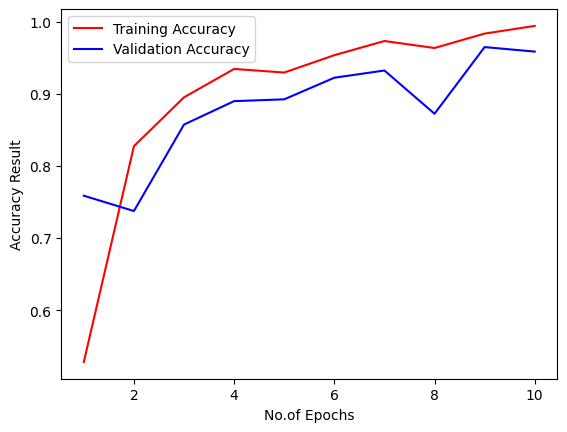

In [27]:
import matplotlib.pyplot as plt

epochs = list(range(1,11))
epochs
plt.plot(epochs,training_history.history["accuracy"],color="red", label = "Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color="blue", label = "Validation Accuracy")
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.legend()
plt.show()

In [28]:
class_name = validation_set.class_names
class_name

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)

Found 800 files belonging to 8 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


(array([[1.00000000e+00, 6.06362460e-10, 6.77916434e-09, ...,
         1.00160505e-12, 1.45316525e-09, 6.51133401e-12],
        [1.00000000e+00, 7.94940710e-11, 4.27807567e-10, ...,
         3.81427068e-14, 6.48527454e-10, 2.95865546e-13],
        [1.00000000e+00, 1.21140190e-11, 4.99111898e-08, ...,
         9.73506621e-14, 4.23825475e-10, 1.65165093e-12],
        ...,
        [2.59845139e-04, 1.76340578e-08, 8.69666183e-05, ...,
         2.63602054e-03, 2.31293321e-01, 7.62600422e-01],
        [6.72244378e-13, 1.10520458e-12, 1.13548615e-13, ...,
         3.04645056e-08, 1.17931529e-06, 9.99927521e-01],
        [1.88332550e-07, 7.81582351e-12, 2.11875749e-06, ...,
         1.67120324e-05, 1.89016585e-03, 9.89413738e-01]],
       shape=(800, 8), dtype=float32),
 (800, 8))

In [31]:
predicated_category = tf.argmax(y_pred,axis=1)
predicated_category

<tf.Tensor: shape=(800,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [32]:
true_category = tf.concat([y for x,y in test_set],axis=0)
true_category

2025-11-19 14:04:04.573082: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(800, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(800, 8), dtype=float32)>

In [33]:
y_true = tf.argmax(true_category,axis=1)
y_true

<tf.Tensor: shape=(800,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_true,predicated_category,target_names=class_name))

                  precision    recall  f1-score   support

     Anthracnose       0.99      0.98      0.98       100
Bacterial Canker       0.93      0.99      0.96       100
  Cutting Weevil       1.00      1.00      1.00       100
        Die Back       1.00      1.00      1.00       100
      Gall Midge       0.98      0.87      0.92       100
         Healthy       0.90      0.99      0.94       100
  Powdery Mildew       0.97      0.92      0.94       100
     Sooty Mould       0.91      0.92      0.92       100

        accuracy                           0.96       800
       macro avg       0.96      0.96      0.96       800
    weighted avg       0.96      0.96      0.96       800



In [35]:
cm = confusion_matrix(y_true,predicated_category)
cm.shape

(8, 8)

### Confusion Metrix

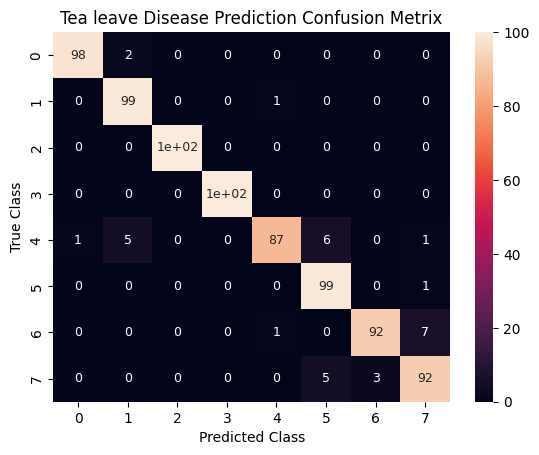

In [40]:
import seaborn as sns
sns.heatmap(cm,annot=True,annot_kws={"size": 9})
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Tea leave Disease Prediction Confusion Metrix")
plt.show()

## Performing Model Prediction